In [7]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('../Aalok/DataForClustering.csv')
features.head(5)

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Target_FR12Mts
0,12/1/1998,19.039398,32.62500,24.562500,6.44,26.125000,30.234375,27.156250,123.31250,10.27,0.19
1,1/1/1999,19.369415,37.81250,24.296875,6.52,27.468750,29.484375,26.796875,127.65625,10.30,0.09
2,2/1/1999,19.674046,34.06250,24.515625,6.46,27.296875,28.671875,26.515625,123.56250,10.07,0.11
3,3/1/1999,20.257921,36.59375,24.937500,6.57,28.593750,26.687500,26.437500,128.37500,10.06,0.17
4,4/1/1999,21.679529,36.81250,28.687500,6.80,29.343750,29.265625,25.515625,133.25000,10.05,0.09


In [13]:
features['label'] = np.where(features['Target_FR12Mts'] < 0, 1, 0)
features.head()

,Date,XLF,XLK,XLI,HY,XLY,XLU,XLP,SPY,VBMFX,Target_FR12Mts,label
0,12/1/1998,19.039398,32.62500,24.562500,6.44,26.125000,30.234375,27.156250,123.31250,10.27,0.19,0
1,1/1/1999,19.369415,37.81250,24.296875,6.52,27.468750,29.484375,26.796875,127.65625,10.30,0.09,0
2,2/1/1999,19.674046,34.06250,24.515625,6.46,27.296875,28.671875,26.515625,123.56250,10.07,0.11,0
3,3/1/1999,20.257921,36.59375,24.937500,6.57,28.593750,26.687500,26.437500,128.37500,10.06,0.17,0
4,4/1/1999,21.679529,36.81250,28.687500,6.80,29.343750,29.265625,25.515625,133.25000,10.05,0.09,0


In [14]:
print('The shape of our features is:', features.shape)

The shape of our features is: (241, 12)


In [16]:
feature_columns = ['XLF', 'XLK', 'XLI', 'HY', 'XLY', 'XLU', 'XLP', 'SPY', 'VBMFX']
X = features[feature_columns]

In [18]:
y = features.label

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape )
print('Testing Features Shape:',X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (168, 9)
Training Labels Shape: (168,)
Testing Features Shape: (73, 9)
Testing Labels Shape: (73,)


In [23]:
#from sklearn.linear_model import RandomForestRegression

#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier(n_estimators= 20, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
rf.score(X_test, y_test)

0.8493150684931506

In [25]:
training_score = rf.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.9940476190476191


In [31]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0])

In [32]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[47  3]
 [ 8 15]]


In [33]:
testing_score = rf.score(X_test, y_test)
print(f"Testing Score: {testing_score}")

Testing Score: 0.8493150684931506


Text(0.5, 257.44, 'Predicted label')

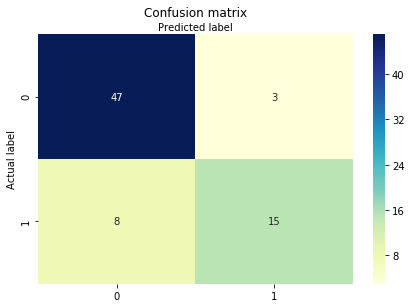

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8493150684931506
Precision: 0.8333333333333334
Recall: 0.6521739130434783


In [ ]:
# Precision: Precision is about being precise, i.e., how accurate your model is.
# In other words, you can say, when a model makes a prediction, how often it is correct.
# In your prediction case, when Logistic Regression model predicted how index is going
# to be low and high, that is 84% of the time.

# Recall: If there are stock which has index low or high in the test set and your Logistic Regression
# model can identify it 65% of the time.

# ROC Curve
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the
# false positive rate. It shows the tradeoff between sensitivity and specificity.

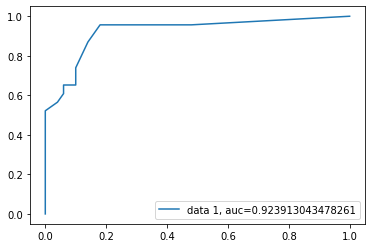

In [37]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# AUC score for the case is 0.92. AUC score 1 represents perfect classifier,
# and 0.5 represents a worthless classifier.

In [48]:
# Instantiate model 
rf1 = RandomForestClassifier(n_estimators =20, random_state=6)

# Train the model on training data
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [49]:
rf1.score(X_test, y_test)

training_score = rf1.score(X_train, y_train)
print(f"Training Score: {training_score}")





Training Score: 1.0


In [50]:
y_pred1 = rf1.predict(X_test)


In [51]:
from sklearn.metrics import confusion_matrix 
cm1 = confusion_matrix(y_test, y_pred) 

print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[47  3]
 [ 8 15]]
